In [1]:
import gym
import agent as my_agent
import torch
import variable as v
from tqdm import tqdm
import utils
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
env = gym.make('Breakout-ram-v0')
train_session = None

In [3]:
num_action = env.action_space.n
dim_state = env.observation_space.shape
dim_state_ravel = np.prod(dim_state)
seed = 79 #78

## Base Agent

In [4]:
dim_state_ravel

128

In [5]:
nn_archi = [{'type': 'linear', 'in': dim_state_ravel, 'out': 64, 'activation': 'relu'}, 
            {'type': 'linear', 'in': 64, 'out': 256, 'activation': 'relu'},
            {'type': 'linear', 'in': 256, 'out': num_action, 'activation': 'None'}]
base_agent_init = {
    'seed': seed,
    'policy_type': 'softmax',
    'temperature': 0.75,
    'exploration_rate': {
        'er': .001,
        'max_er': 1,
        'min_er': 0.0,
        'decay_er': 0.01,
        'constant_er': True
    },
    'num_action': num_action,
    'max_position_init': .04,
    'max_position_reward_bonus': 0.0,
    'neural_network_handler': {
        'seed': seed,
        'discount_factor': .99,
        'nn_archi': nn_archi,
        "eval_train_delay": 300
    },
    'replay_buffer': {'buffer_size': 25000, 
                      'mini_batch_size': 64, 
                      'seed': seed},
    'optim': {'lr': 5e-4},
    'early_stop': {
        'skip_training_threshold': 150.0, 
        'stop_training_threshold': 200.0, 
        'episode_window_skip': 10, 
        'episode_window_stop': 100
    }
}

### To compare Agent(s)

In [6]:
if not train_session:
    print('Train Session reset')
    train_session = utils.TrainSession({}, env, seed)

Train Session reset


In [7]:
tuned_parameters = {('neural_network_handler', 'discount_factor'): [0.99]}


grid_agent_names = train_session.parameter_grid_append(my_agent.DQNAgent, base_agent_init, tuned_parameters)
s = '\n- '.join(grid_agent_names)
print(f"Agents added: \n- {s}")

Agents added: 
- neural_network_handler_discount_factor:0.99;


In [8]:
agents_created = {'dqn_agent': my_agent.DQNAgent(base_agent_init),
                  'ddqn_agent': my_agent.DDQNAgent(base_agent_init)}
manual_agent_names = train_session.append_agents(agents_created)

In [9]:
all_agent_names = train_session.agents.keys()
s = '\n- '.join(all_agent_names)
print(f"All Agents: \n- {s}")

All Agents: 
- neural_network_handler_discount_factor:0.99;
- dqn_agent
- ddqn_agent


In [12]:
n_episode = 3000
t_max_per_episode = 1000
graphical = False
selected_agent_names = ['ddqn_agent']

In [13]:
train_session.train(n_episode=n_episode, graphical=graphical, agent_subset=selected_agent_names)

100%|██████████| 3000/3000 [1:07:31<00:00,  1.35s/it]


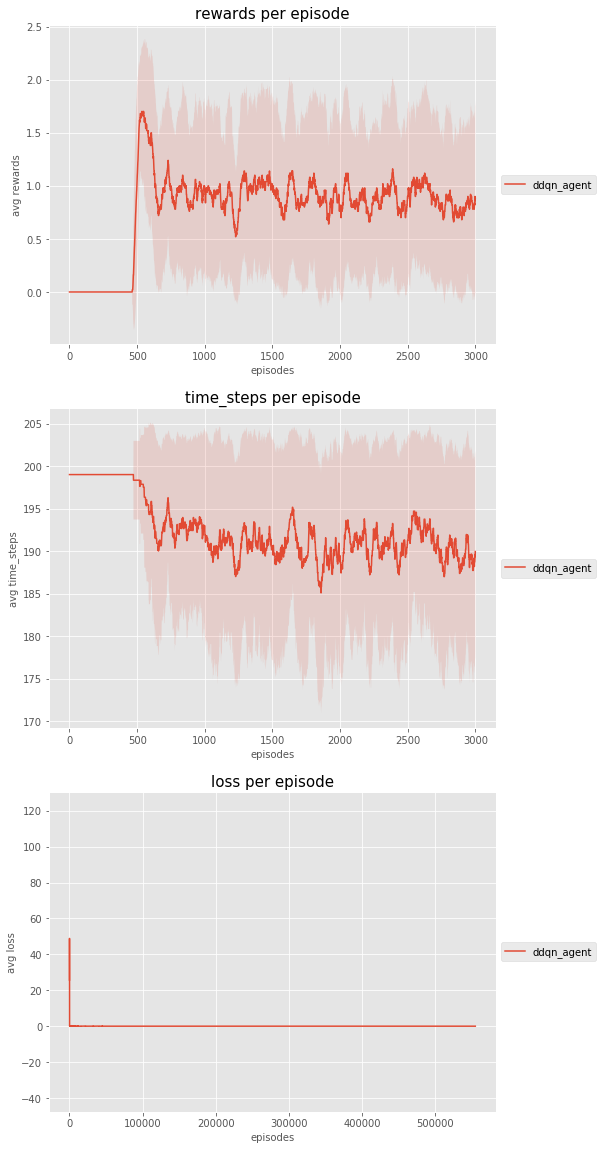

In [14]:
train_session.plot_results(window=50, agent_subset=selected_agent_names)

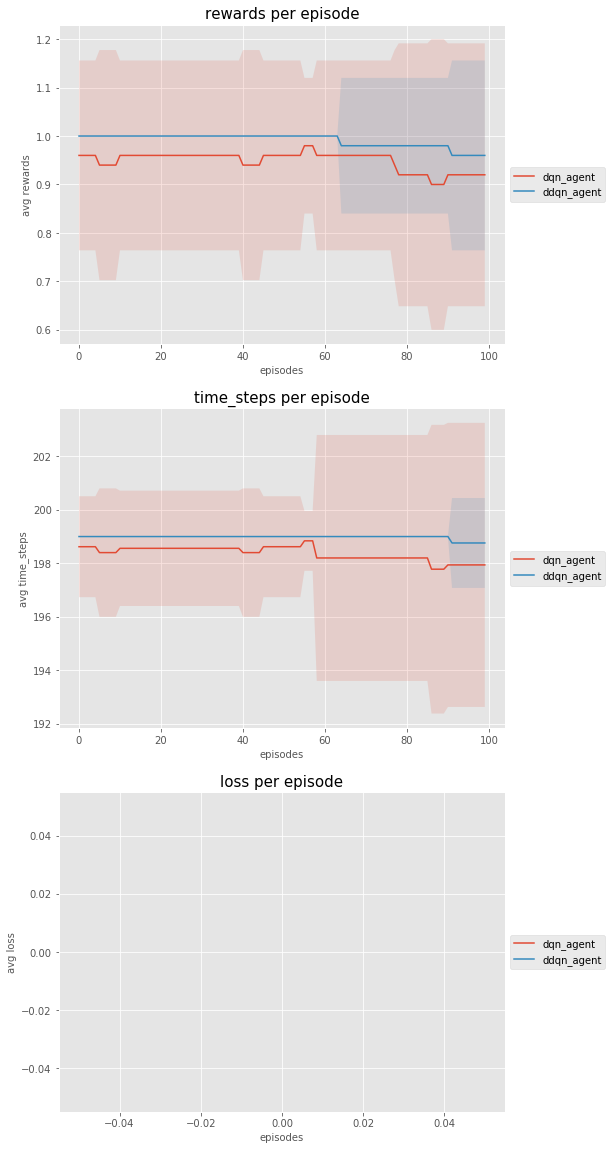

In [13]:
train_session.plot_results(window=50, agent_subset=selected_agent_names)

In [43]:
hist = train_session.agents['early_stop_skip_training_threshold:180.0;early_stop_stop_training_threshold:200.0;'].early_stop.skip_episode_history